Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             25 non-null     int64 
 1   Annual_Income       25 non-null     int64 
 2   Credit_Score        25 non-null     int64 
 3   Products_Purchased  25 non-null     object
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes
None

Summary Statistics:
         User_ID  Annual_Income  Credit_Score
count  25.000000      25.000000     25.000000
mean   13.000000   70600.000000    699.600000
std     7.359801   15365.003525     51.192447
min     1.000000   45000.000000    600.000000
25%     7.000000   60000.000000    670.000000
50%    13.000000   70000.000000    700.000000
75%    19.000000   85000.000000    730.000000
max    25.000000   95000.000000    780.000000

Missing Values:
User_ID               0
Annual_Income         0
Credit_Score          0
Produ

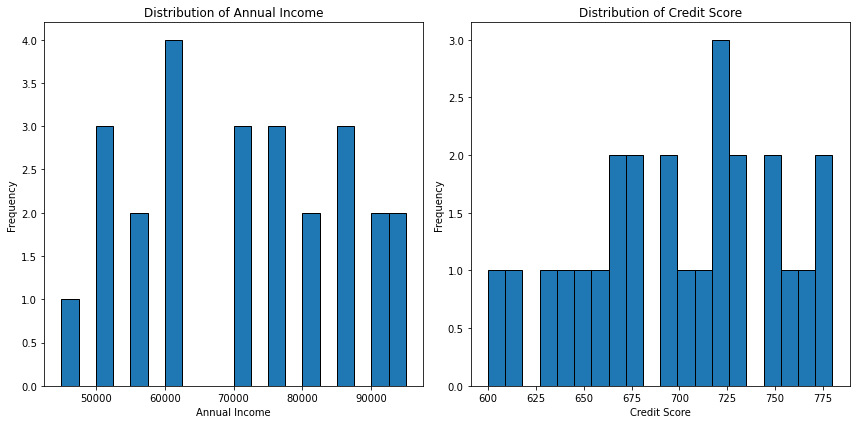

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Import the CSV file with tab delimiter
file_path = '/Users/sravani/Desktop/Data Science (Masters)/Sem 3/ML/amazon_dataset.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)


# Step 2: Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize the distribution of Annual Income and Credit Score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['Annual_Income'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')

plt.subplot(1, 2, 2)
data['Credit_Score'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')

plt.tight_layout()
plt.show()

# Step 3: Credit Card Approval
# For example, set a credit score threshold for approval
credit_score_threshold = 700
data['Credit_Card_Approval'] = data['Credit_Score'] >= credit_score_threshold

# Step 4: Product Recommendation
# You can use more advanced methods here, like collaborative or content-based filtering

# Step 5: Results and Conclusion
# Present your findings and conclusions to a non-technical audience

# Save the updated dataset with new columns
data.to_csv('/Users/sravani/Desktop/Data Science (Masters)/Sem 3/ML/amazon_dataset_with_results1.csv', index=False)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Import the CSV file with tab delimiter
file_path = '/Users/sravani/Desktop/Data Science (Masters)/Sem 3/ML/amazon_dataset.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Step 2: Exploratory Data Analysis (EDA)
# ... (same as before)

# Step 3: Credit Card Approval
# ... (same as before)

# Step 4: Product Recommendation
# Using content-based filtering based on "Products_Purchased" column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Products_Purchased'].fillna(''))

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get product recommendations for a given product
def get_product_recommendations(product_name, cosine_sim=cosine_sim):
    idx = data[data['Products_Purchased'].str.contains(product_name, case=False)].index
    sim_scores = list(enumerate(cosine_sim[idx][0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Get top 3 similar products
    product_indices = [i[0] for i in sim_scores]
    return data['Products_Purchased'].iloc[product_indices]

# Example: Get product recommendations for "Electronics"
product_recommendations = get_product_recommendations("Electronics")
print("Product Recommendations:")
print(product_recommendations)

# Step 5: Results and Conclusion
# ... (same as before)

# Save the updated dataset with new columns
data.to_csv('/Users/sravani/Desktop/Data Science (Masters)/Sem 3/ML/amazon_dataset_with_results2.csv', index=False)


Product Recommendations:
14    Furniture, Home Improvement
17           Electronics, Gadgets
24           Electronics, Cameras
Name: Products_Purchased, dtype: object
